# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#https://stackoverflow.com/questions/52638844/modulenotfounderror-no-module-named-citipy-error
#to install pip on windows
#https://stackoverflow.com/questions/31172719/pip-install-access-denied-on-windows
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

#about city py 
#https://github.com/wingchen/citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
#https://restcountries.eu/#api-endpoints-full-name
#https://restcountries.eu/rest/v2/alpha/IN
lat_lngs = []
cities = []
ls_cities_countries = []
# weather_data = {
#     "city":"",
#     "country":"",
#     "lat":"",
#     "lon":"",
#     "temperature":"",
#     "humidity":"",
#     "coludiness":"",
#     "wind_speed":""    
# }

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=6000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=6000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_country = []
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name    
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    try:
        country_name = requests.get("https://restcountries.eu/rest/v2/alpha/"+country).json()["name"]
    except:
        print("Country not found")
    city_country.append(city)
    city_country.append(country_name)
    city_country.append(lat_lng[0])
    city_country.append(lat_lng[1])
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        ls_cities_countries.append(city_country)

# Print the city count to confirm sufficient count
type(cities)
# print(api_key)

lst_weather_data = []
for city in ls_cities_countries:
    dict_weather_data = {}
    dict_weather_data["city"] = city[0]
    dict_weather_data["county"] = city[1]
    dict_weather_data["lat"] = city[2]
    dict_weather_data["lon"] = city[3]
    lst_weather_data.append(dict_weather_data)



Country not found


In [3]:
df_weather_data = pd.DataFrame(lst_weather_data)

In [4]:
df_weather_data.head(4)
# df_weather_data["county"].nunique()

,city,county,lat,lon
0,albany,Australia,-59.950639,116.755627
1,punta arenas,Chile,-65.150700,-110.908474
2,nanortalik,Greenland,53.078565,-36.401235
3,georgetown,"Saint Helena, Ascension and Tristan da Cunha",-16.684453,-22.561589


In [5]:
# type(df_weather_data.loc[:,"county"])

In [6]:
# type(df_weather_data.loc[:,["county"]])

In [32]:
# for i, j in (df_weather_data.head(2).iterrows()):
# #     print(i)
#     print(j.city)
from datetime import date

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
#https://cmdlinetips.com/2018/12/how-to-loop-through-pandas-rows-or-how-to-iterate-over-pandas-rows/

df_weather_data["temperature"] = ""
df_weather_data["humidity"] = ""
df_weather_data["coludiness"] = ""
df_weather_data["wind_speed"] = ""


#(0K − 273.15) × 9/5 + 32
# base_url variable to store url 
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# for city in df_weather_data.loc[:,"city"]:
for index, row in (df_weather_data.iterrows()):
    
    city = row.city
    country = row.county
    complete_url = base_url + "APPID=" + api_key + "&q=" + city +"," + country
#     print(complete_url)
    response = requests.get(complete_url)    
    data = response.json()
    try:
      temp_in_f = (data["main"]["temp_max"] - 273.15) * (9/5)+32
                   
      df_weather_data.loc[df_weather_data["city"] == city,["temperature"]] = str(int(temp_in_f))
              
      df_weather_data.loc[df_weather_data["city"] == city,["humidity"]] = str(data["main"]["humidity"])
          
      df_weather_data.loc[df_weather_data["city"] == city,["coludiness"]] = str(data["clouds"]["all"])
          
      df_weather_data.loc[df_weather_data["city"] == city,["wind_speed"]] = str(data["wind"]["speed"])
    
    except:
      pass


In [45]:
#printing city data.. purposely not printing it while processing as it takes time
#and need to call this many times as there are outliers in data, which
#disturbs ultimate plot. 
#note, do not call APIs again as current data set is good
#exported dataframe to csv, use that to re-create images instead, as current data is good

print("Begining data retrival")
print("........................................")
for index, row in df_weather_data.iterrows():
    if(row.temperature == ""):
        print("Processing Record " + str(index) + " | " + row.city + " data not available")
    else:
        print("Processing Record " + str(index) + " | " + row.city + "--"+ str(row.temperature))    

Begining data retrival
........................................
Processing Record 0 | albany--64
Processing Record 1 | punta arenas--46
Processing Record 2 | nanortalik--39
Processing Record 3 | georgetown--84
Processing Record 4 | ushuaia--33
Processing Record 5 | vaini--73
Processing Record 6 | grand forks--59
Processing Record 7 | saint-philippe--62
Processing Record 8 | nemuro--55
Processing Record 9 | busselton--48
Processing Record 10 | mahebourg--73
Processing Record 11 | namatanai--79
Processing Record 12 | milkovo--62
Processing Record 13 | atuona--79
Processing Record 14 | vallenar--75
Processing Record 15 | mataura--48
Processing Record 17 | chuy--56
Processing Record 18 | souillac--57
Processing Record 19 | comodoro rivadavia--62
Processing Record 20 | cape town--62
Processing Record 21 | port elizabeth--73
Processing Record 22 | bathsheba--86
Processing Record 23 | san policarpo--79
Processing Record 25 | beloha--73
Processing Record 26 | iqaluit--37
Processing Record 27 |

Processing Record 647 | yangjiang--71
Processing Record 648 | lata--34
Processing Record 649 | wismar--39
Processing Record 650 | milas--59
Processing Record 651 | shakiso--53
Processing Record 652 | biak--62
Processing Record 653 | tashtagol--45
Processing Record 654 | ararangua--61
Processing Record 655 | belebey--50
Processing Record 656 | komsomolskiy--32
Processing Record 657 | manakara--68
Processing Record 658 | wicklow--53
Processing Record 659 | mamallapuram--82
Processing Record 660 | kroya--71
Processing Record 662 | ornskoldsvik--37
Processing Record 663 | guarda--62
Processing Record 666 | pozo colorado--73
Processing Record 667 | bereznik--31
Processing Record 668 | kuala lipis--70
Processing Record 669 | tautira--82
Processing Record 671 | berlevag--42
Processing Record 672 | maniwaki--55
Processing Record 673 | iguape--63
Processing Record 674 | anloga--78
Processing Record 677 | itupiranga--89
Processing Record 678 | emerald--69
Processing Record 679 | vidor--91
Proces

Processing Record 1006 | jardim--63
Processing Record 1007 | ondjiva--75
Processing Record 1008 | tarakan--75
Processing Record 1009 | thisted--42
Processing Record 1010 | hovd--46
Processing Record 1011 | mahibadhoo--82
Processing Record 1012 | yazman--61
Processing Record 1013 | sakaraha--76
Processing Record 1014 | yamada--57
Processing Record 1015 | stolin--34
Processing Record 1016 | shimizu--66
Processing Record 1017 | elko--60
Processing Record 1018 | challans--55
Processing Record 1019 | akranes--48
Processing Record 1020 | epinal--53
Processing Record 1021 | jonava--35
Processing Record 1022 | rehoboth--69
Processing Record 1023 | vostochnyy--33
Processing Record 1024 | chumikan--32
Processing Record 1025 | suntar--31
Processing Record 1026 | binga--73
Processing Record 1028 | oranjestad--87
Processing Record 1029 | ardesen--60
Processing Record 1030 | zacatepec--64
Processing Record 1032 | puri--73
Processing Record 1034 | wagar--87
Processing Record 1035 | waynesville--60
Pr

Processing Record 1526 | umea--32
Processing Record 1527 | baglung--49
Processing Record 1529 | tangshan--49
Processing Record 1530 | progreso--64
Processing Record 1532 | linkoping--32
Processing Record 1533 | riwaka--57
Processing Record 1534 | farkhor--62
Processing Record 1536 | pandaria--67
Processing Record 1537 | nisia floresta--80
Processing Record 1538 | kapuskasing--51
Processing Record 1539 | anadyr--30
Processing Record 1540 | alvdal--30
Processing Record 1541 | tual--78
Processing Record 1542 | bosanski samac--46
Processing Record 1543 | atherton--73
Processing Record 1544 | gamba--33
Processing Record 1545 | verkhnyaya inta--33
Processing Record 1546 | gorey--73
Processing Record 1547 | barcelona--71
Processing Record 1548 | irbeyskoye--40
Processing Record 1549 | mabaruma--79
Processing Record 1550 | great falls--60
Processing Record 1551 | torata--89
Processing Record 1552 | hayden--62
Processing Record 1553 | ambon--57
Processing Record 1555 | camopi--86
Processing Rec

In [46]:
df_weather_data_bkp = df_weather_data
df_weather_data.head(3)

,city,county,lat,lon,temperature,humidity,coludiness,wind_speed
0,albany,Australia,-59.950639,116.755627,64,87,90,6.20
1,punta arenas,Chile,-65.150700,-110.908474,46,61,0,12.30
2,nanortalik,Greenland,53.078565,-36.401235,39,81,0,0.83


In [48]:
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

df_weather_data.drop(df_weather_data.loc[df_weather_data["temperature"] == "",:].index, inplace=True)

df_weather_data["temperature"] = df_weather_data["temperature"].astype(int)
df_weather_data["humidity"] = df_weather_data["humidity"].astype(int)
df_weather_data["coludiness"] = df_weather_data["coludiness"].astype(int)
df_weather_data["wind_speed"] = df_weather_data["wind_speed"].astype(float)

df_weather_data.drop(df_weather_data.loc[df_weather_data["humidity"] > 100,:].index, inplace=True)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
df_weather_data.count()
df_weather_data.to_csv("D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/weather_api_data.csv", index=False)

In [50]:
df_weather_data.loc[:,["city"]].to_csv("D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/weather_api_city_data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

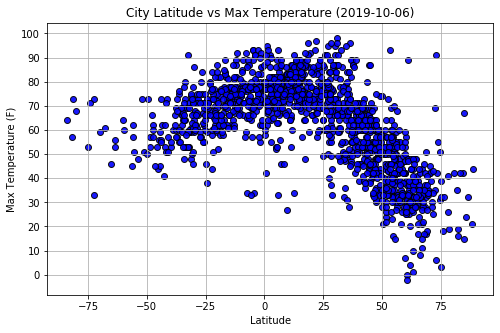

In [51]:
#City Latitude vs Max Temperature 
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=10))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["temperature"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# plt.legend(loc="upper left")
plt.title("City Latitude vs Max Temperature (" + str(date.today()) + ")")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/City_Latitude_Vs_MaxTemp.png')

#### Latitude vs. Humidity Plot

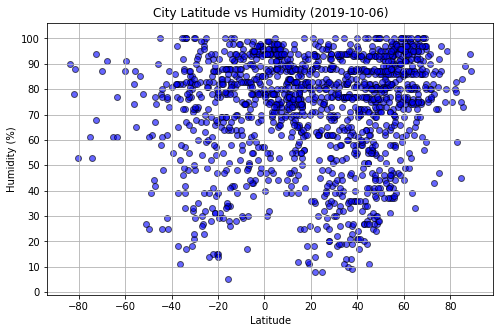

In [52]:
#City Latitude vs Humidity
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=10))
plt.xticks(np.arange(-80, 100, step=20))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["humidity"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.60)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (" + str(date.today()) + ")")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/City_Latitude_Vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

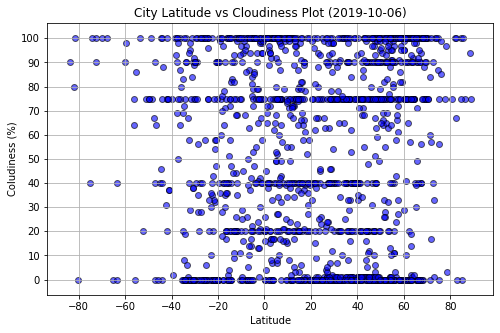

In [53]:
#City Latitude vs Cloudiness 
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=10))
plt.xticks(np.arange(-80, 100, step=20))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["coludiness"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.60)

plt.xlabel("Latitude")
plt.ylabel("Coludiness (%)")
plt.title("City Latitude vs Cloudiness Plot (" + str(date.today()) + ")")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/City_Latitude_Vs_Coludiness.png')

#### Latitude vs. Wind Speed Plot

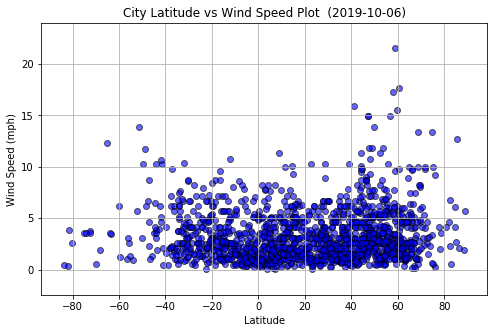

In [54]:
#City Latitude vs WindSpeed 
plt.figure(figsize=(8,5))
plt.grid()
plt.yticks(np.arange(0, 120, step=5))
plt.xticks(np.arange(-80, 100, step=20))
plt.scatter(df_weather_data["lat"]
            , df_weather_data["wind_speed"]
            , marker="o", facecolors="blue", edgecolors="black", alpha=0.60)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed Plot  (" + str(date.today()) + ")")
plt.savefig('D:/MyWork/GeorgiaTech/ClassesWork/6_HomeWork-PythonApi/City_Latitude_Vs_WindSpeed.png')